[*********************100%%**********************]  1 of 1 completed


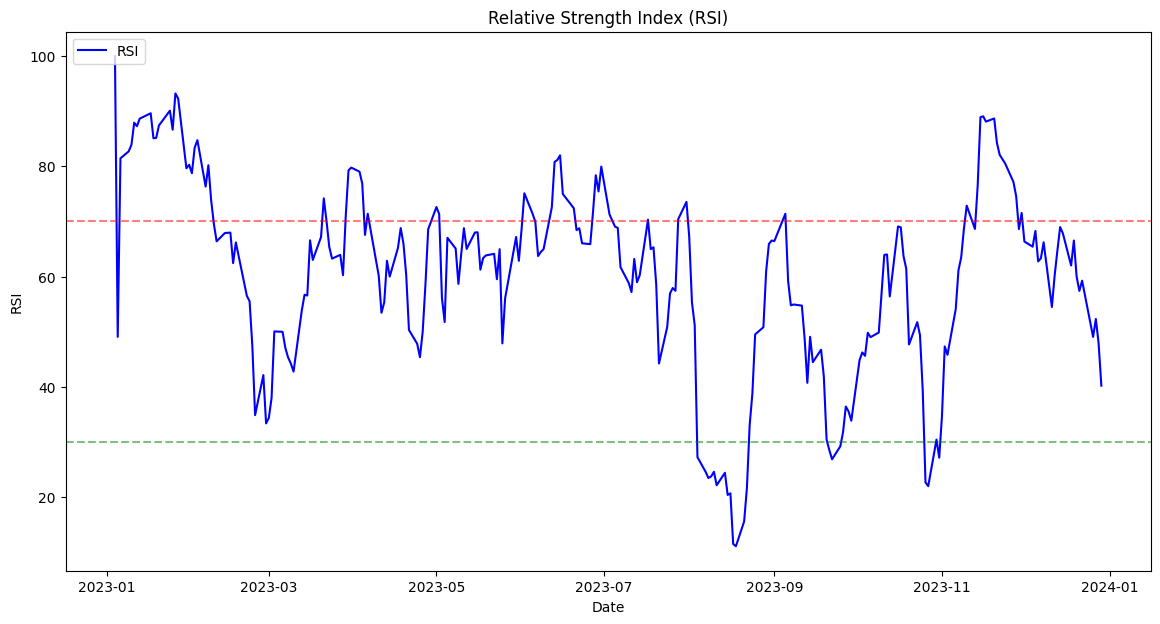

In [9]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

def calculate_rsi(data, window=14):
    delta = data['Close'].diff()

    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    data['RSI'] = rsi
    return data

def plot_rsi(data):
    plt.figure(figsize=(14,7))

    # Plot the RSI
    plt.plot(data.index, data['RSI'], label='RSI', color='blue')
    plt.axhline(70, linestyle='--', alpha=0.5, color='red')
    plt.axhline(30, linestyle='--', alpha=0.5, color='green')

    plt.title('Relative Strength Index (RSI)')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.legend(loc='upper left')
    plt.show()

# Example usage
ticker = 'AAPL'
start_date = '2023-01-01'
end_date = '2023-12-31'
window = 14  # RSI window size

stock_data = get_stock_data(ticker, start_date, end_date)
stock_data_rsi = calculate_rsi(stock_data, window)
plot_rsi(stock_data_rsi)
